***

# Nagy mennyiségű adatfeldolgozás

<font size="4">*Projektmunka*</font>

## Balázs Patrícia

<font size="4">Neptun kód: SO168Q</font>

<font size="4">Data kód: 51</font>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

 ***


### Az adathalmaz megismerése, a benne szereplő attribútumok bemutatása és általános jellemzése.


In [2]:
df = pd.read_csv('data51.csv')
df.head(10)

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,13/03/2012,11:45,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,...,9690.24,12604.20,95436.8,758.880,0,0,0,18.1150,48.3750,2.0
1,13/03/2012,12:00,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,...,11022.00,10787.20,95436.8,762.069,0,0,0,18.4147,47.8080,2.0
2,13/03/2012,12:15,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,...,13960.50,9669.63,95398.6,766.251,0,0,0,18.8533,47.4320,2.0
3,13/03/2012,12:30,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,...,18511.20,9648.13,95360.3,766.037,0,0,0,19.2907,47.0240,2.0
4,13/03/2012,12:45,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,...,26349.00,9208.32,95354.9,762.743,0,0,0,19.7400,45.4743,2.0
5,13/03/2012,13:00,19.6407,19.2773,20.0,218.389,216.011,39.8107,42.0347,81.2427,...,36511.70,8694.78,95354.9,752.683,0,0,0,20.1660,45.5467,2.0
6,13/03/2012,13:15,19.9120,19.5367,20.0,218.155,215.829,39.8613,41.9947,81.3600,...,49288.50,8501.25,95354.9,740.949,0,0,0,20.5660,44.9680,2.0
7,13/03/2012,13:30,20.1640,19.7307,20.0,216.661,215.296,39.8240,41.9947,81.0240,...,62253.70,8687.62,95174.7,721.109,0,0,0,20.8427,45.1813,2.0
8,13/03/2012,13:45,20.4120,19.9693,20.0,217.461,214.549,39.9587,42.1253,81.1040,...,71453.40,8888.32,91848.7,699.392,0,0,0,21.2040,45.4160,2.0
9,13/03/2012,14:00,20.6400,20.1407,20.0,215.349,213.909,39.9400,42.0427,81.1813,...,80076.80,9046.02,87217.5,677.675,0,0,0,21.5227,45.0213,2.0


<font size="3">Az adathalmaz különböző környezeti adatokat tartalmaz, mint a levegő hőmérséklete, páratartalma, szén-dioxid szintje (…) külső és belső környezetben. Az egyes rekordok különböző időpontokban történő mérések eredményei.</font>

In [3]:
df.shape

(2764, 24)

<font size="3">Az adathalmaz 2764 rekordból és 24 oszlopból épül fel.</font>

In [4]:
df.columns

Index(['1:Date', '2:Time', '3:Temperature_Comedor_Sensor',
       '4:Temperature_Habitacion_Sensor', '5:Weather_Temperature',
       '6:CO2_Comedor_Sensor', '7:CO2_Habitacion_Sensor',
       '8:Humedad_Comedor_Sensor', '9:Humedad_Habitacion_Sensor',
       '10:Lighting_Comedor_Sensor', '11:Lighting_Habitacion_Sensor',
       '12:Precipitacion', '13:Meteo_Exterior_Crepusculo',
       '14:Meteo_Exterior_Viento', '15:Meteo_Exterior_Sol_Oest',
       '16:Meteo_Exterior_Sol_Est', '17:Meteo_Exterior_Sol_Sud',
       '18:Meteo_Exterior_Piranometro', '19:Exterior_Entalpic_1',
       '20:Exterior_Entalpic_2', '21:Exterior_Entalpic_turbo',
       '22:Temperature_Exterior_Sensor', '23:Humedad_Exterior_Sensor',
       '24:Day_Of_Week'],
      dtype='object')

In [5]:
df = df.rename(columns={'1:Date': 'Date', '2:Time':'Time', '3:Temperature_Comedor_Sensor':'Indoor temperature (dinning-room)', 
                        '4:Temperature_Habitacion_Sensor': 'Indoor temperature (room)', '5:Weather_Temperature':'Weather forecast temperature',
                        '6:CO2_Comedor_Sensor':'Carbon dioxide in ppm (dinning room)', '7:CO2_Habitacion_Sensor':'Carbon dioxide in ppm (room)',
                        '8:Humedad_Comedor_Sensor':'Relative humidity (dinning room) in %', '9:Humedad_Habitacion_Sensor':'Relative humidity (room) in %',
                        '10:Lighting_Comedor_Sensor':'Lighting (dinning room), in Lux', '11:Lighting_Habitacion_Sensor':'Lighting (room), in Lux',
                        '12:Precipitacion':'Rain', '13:Meteo_Exterior_Crepusculo':'Sun dusk',
                        '14:Meteo_Exterior_Viento':'Wind, in m/s', '15:Meteo_Exterior_Sol_Oest':'Sun light in west facade, in Lux',
                        '16:Meteo_Exterior_Sol_Est':'Sun light in east facade, in Lux', '17:Meteo_Exterior_Sol_Sud':'Sun light in south facade, in Lux',
                        '18:Meteo_Exterior_Piranometro':'Sun irradiance, in W/m2', '19:Exterior_Entalpic_1':'Enthalpic motor 1',
                        '20:Exterior_Entalpic_2':'Enthalpic motor 2', '21:Exterior_Entalpic_turbo':'Enthalpic motor turbo',
                        '22:Temperature_Exterior_Sensor':'Outdoor temperature', '23:Humedad_Exterior_Sensor':'Outdoor relative humidity, in %',
                        '24:Day_Of_Week':'Day of Week'})

In [6]:
df.columns

Index(['Date', 'Time', 'Indoor temperature (dinning-room)',
       'Indoor temperature (room)', 'Weather forecast temperature',
       'Carbon dioxide in ppm (dinning room)', 'Carbon dioxide in ppm (room)',
       'Relative humidity (dinning room) in %',
       'Relative humidity (room) in %', 'Lighting (dinning room), in Lux',
       'Lighting (room), in Lux', 'Rain', 'Sun dusk', 'Wind, in m/s',
       'Sun light in west facade, in Lux', 'Sun light in east facade, in Lux',
       'Sun light in south facade, in Lux', 'Sun irradiance, in W/m2',
       'Enthalpic motor 1', 'Enthalpic motor 2', 'Enthalpic motor turbo',
       'Outdoor temperature', 'Outdoor relative humidity, in %',
       'Day of Week'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 24 columns):
Date                                     2764 non-null object
Time                                     2764 non-null object
Indoor temperature (dinning-room)        2764 non-null float64
Indoor temperature (room)                2764 non-null float64
Weather forecast temperature             2764 non-null float64
Carbon dioxide in ppm (dinning room)     2764 non-null float64
Carbon dioxide in ppm (room)             2764 non-null float64
Relative humidity (dinning room) in %    2764 non-null float64
Relative humidity (room) in %            2764 non-null float64
Lighting (dinning room), in Lux          2764 non-null float64
Lighting (room), in Lux                  2764 non-null float64
Rain                                     2764 non-null float64
Sun dusk                                 2764 non-null float64
Wind, in m/s                             2764 non-null float64
Sun light in 

<font size="3">Az oszlopok rendre a következők (átnevezés után):

1.	Date: 
        * Object típusú, az adatok mérésének dátumát adja meg. 
        * 2012 márciusi és áprilisi adatok szerepelnek az adatbázisban
2.	Time: in UTC
        * Object típusú, az adatok mérésének időpontját adja meg
        * Sorba rendezést követően megfigyelhető, hogy az egyes mérések 15 perc különbséggel történtek
3.	Indoor temperature (dinning-room)
        * float64 típusú, az étkezőben mért hőmérsékletet adja meg °C-ban
        * folytonos
4.	Indoor temperature (room)
        * float64 típusú, a szobában mért hőmérsékletet adja meg °C-ban
        * folytonos
5.	Weather forecast temperature
        * float64 típusú, az előrejelzés hőmérsékletet adja meg °C-ban
        * folytonos
6.	Carbon dioxide in ppm (dinning room)
        * float64 típusú, az étkezőben mért szén-dioxid szintet adja meg ppm-ben
        * folytonos
7.	Carbon dioxide in ppm (room)
        * float64 típusú, a szobában mért szén-dioxid szintet adja meg ppm-ben
        * folytonos
8.	Relative humidity (dinning room)
        * float64 típusú, az étkezőben mért relatív páratartalmat adja meg %-ban
        * folytonos
9.	Relative humidity (room)
        * float64 típusú, a szobában mért relatív páratartalmat adja meg %-ban
        * folytomos
10.	Lighting (dinning room)
        * float64 típusú, az étkezőben mért relatív megvilágítást adja meg Lux-ban
        * folytonos
11.	Lighting (room)
        * float64 típusú, a szobában mért relatív megvilágítást adja meg Lux-ban
        * folytonos
12.	Rain, the proportion of the last 15 minutes where rain was detected
        * float64 típusú, 0 és 1 közötti érték, az eső elmúlt 15 percben vett arányát adja meg
        * folytonos
13.	Sun dusk.
        * float64 típusú, az alkonyathoz kapcsolódó érték
        * folytonos
14.	Wind, in m/s
        * float64 típusú
        * a szél erősségét adja meg m/s-ban
        * folytonos
15.	Sun light in west facade
        * float64 típusú
        * A nyugati homlokzaton mért napfény erősségét adja meg Lux-ban
        * folytonos
16.	Sun light in east facade
        * float64 típusú
        * A keleti homlokzaton mért napfény erősségét adja meg Lux-ban
        * folytonos
17.	Sun light in south facade
        * float64 típusú
        * A déli homlokzaton mért napfény erősségét adja meg Lux-ban
        * folytonos
18.	Sun irradiance, in W/m2
        * float64 típusú
        * A Nap sugárzását adja meg W/m2-ben
        * folytonos
19.	Enthalpic motor 1, 0 or 1 (on-off).
        * int64 típusú, bináris
        * központi szellőztető készülék
        * értéküke 1 ha be van kapcsolva, 0 ha ki van kapcsolva
20.	Enthalpic motor 2, 0 or 1 (on-off).
        * int64 típusú, bináris
        * központi szellőztető készülék
        * értéküke 1 ha be van kapcsolva, 0 ha ki van kapcsolva
21.	Enthalpic motor turbo, 0 or 1 (on-off).
        * int64 típusú, bináris
        * központi szellőztető készülék
        * értéküke 1 ha be van kapcsolva, 0 ha ki van kapcsolva
22.	Outdoor temperature
        * float64 típusú, a külső hőmérsékletet adja meg °C-ban
        * folytonos
23.	Outdoor relative humidity
        * float64 típusú, a kint mért relatív páratartalmat adja meg %-ban
24.	Day of the week 
        * float64 típusú
        * A dátumból származtatott érték
        * A hát napját adja meg, amin a mérés történt
        * 1 = Hétfő, 7 = Vasárnap
</font>

In [8]:
df.describe()

,Indoor temperature (dinning-room),Indoor temperature (room),Weather forecast temperature,Carbon dioxide in ppm (dinning room),Carbon dioxide in ppm (room),Relative humidity (dinning room) in %,Relative humidity (room) in %,"Lighting (dinning room), in Lux","Lighting (room), in Lux",Rain,...,"Sun light in west facade, in Lux","Sun light in east facade, in Lux","Sun light in south facade, in Lux","Sun irradiance, in W/m2",Enthalpic motor 1,Enthalpic motor 2,Enthalpic motor turbo,Outdoor temperature,"Outdoor relative humidity, in %",Day of Week
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,...,2764.000000,2764.000000,2764.000000,2764.000000,2764.0,2764.0,2764.0,2764.000000,2764.000000,2764.000000
mean,19.199722,18.824852,13.897396,208.479123,211.065844,44.878420,47.321220,26.745381,40.732571,0.047033,...,14936.617682,12248.000148,22047.525813,215.010017,0.0,0.0,0.0,16.757847,55.981988,3.954438
std,2.853315,2.821178,4.171991,27.032686,28.469144,6.587440,7.557795,23.298441,42.326087,0.206705,...,25964.049455,21758.550527,32709.387051,297.234046,0.0,0.0,0.0,3.885869,13.019610,1.991799
min,11.352000,11.076000,0.000000,187.339000,188.907000,27.084000,29.594700,10.740000,11.328000,0.000000,...,0.000000,0.000000,0.000000,-4.164670,0.0,0.0,0.0,9.223330,22.260700,1.000000
25%,17.450800,17.060350,10.783325,200.893250,202.682750,40.351975,42.531325,11.588700,13.265300,0.000000,...,0.000000,0.000000,0.000000,-3.381330,0.0,0.0,0.0,13.662025,46.430675,2.000000
50%,19.373650,19.021000,15.000000,207.045500,209.408000,45.434650,47.534700,11.801300,17.690000,0.000000,...,0.000000,0.000000,0.000000,3.922000,0.0,0.0,0.0,16.490350,57.477350,4.000000
75%,21.229975,20.828700,16.666700,211.245500,213.218750,49.352675,52.685975,31.224000,52.057350,0.000000,...,15088.000000,11131.275000,38736.575000,435.434500,0.0,0.0,0.0,19.397800,65.649325,6.000000
max,25.540000,24.944000,26.000000,594.389000,609.237000,60.957300,62.594700,110.693000,162.965000,1.000000,...,95278.400000,85535.400000,95704.400000,1028.270000,0.0,0.0,0.0,29.908000,83.805300,7.000000


<font size="3">Az egyes attribútumok általános jellemzésére szolgál a describe metódus, amellyel megfigyelhető az oszlopokban szereplő értékek átlaga (___mean___), a szórása (___std___), a minimum értéke (___min___), a 25-50-75%-os kvantilise valamint a maximum értéke (___max___) is. Emellet a ___count___ sorból kiolvasható, hogy vannak-e hiányzó értékek az adathalmazban. Mivel mindegyik attribútum esetén ez a szám megegyezik a táblázat rekordjainak számával, így nincsenek hiányzó értékek.</font>

In [9]:
df.sort_values(by=['Date','Time'],ascending=[True,True]).head()

,Date,Time,Indoor temperature (dinning-room),Indoor temperature (room),Weather forecast temperature,Carbon dioxide in ppm (dinning room),Carbon dioxide in ppm (room),Relative humidity (dinning room) in %,Relative humidity (room) in %,"Lighting (dinning room), in Lux",...,"Sun light in west facade, in Lux","Sun light in east facade, in Lux","Sun light in south facade, in Lux","Sun irradiance, in W/m2",Enthalpic motor 1,Enthalpic motor 2,Enthalpic motor turbo,Outdoor temperature,"Outdoor relative humidity, in %",Day of Week
1777,01/04/2012,00:00,21.3093,20.8360,12.0,214.261,222.037,36.3800,37.6160,11.5073,...,0.0,0.0,0.0,-3.44667,0,0,0,16.2933,46.2027,6.06667
1778,01/04/2012,00:15,21.1667,20.7107,11.0,214.891,220.480,36.2347,37.5840,11.2467,...,0.0,0.0,0.0,-3.57733,0,0,0,16.1753,45.7893,7.00000
1779,01/04/2012,00:30,21.0347,20.5760,11.0,214.187,219.221,36.1320,37.5560,11.5240,...,0.0,0.0,0.0,-3.70800,0,0,0,16.0633,45.4400,7.00000
1780,01/04/2012,00:45,20.8773,20.4273,11.0,213.291,219.083,35.8773,37.4347,11.6053,...,0.0,0.0,0.0,-3.31600,0,0,0,15.9393,46.2693,7.00000
1781,01/04/2012,01:00,20.7360,20.2947,11.0,212.939,217.845,35.8920,37.4560,11.7033,...,0.0,0.0,0.0,-3.57733,0,0,0,15.7533,45.1253,7.00000


In [10]:
df.sort_values(by=['Date','Time'],ascending=[False,False]).head()

,Date,Time,Indoor temperature (dinning-room),Indoor temperature (room),Weather forecast temperature,Carbon dioxide in ppm (dinning room),Carbon dioxide in ppm (room),Relative humidity (dinning room) in %,Relative humidity (room) in %,"Lighting (dinning room), in Lux",...,"Sun light in west facade, in Lux","Sun light in east facade, in Lux","Sun light in south facade, in Lux","Sun irradiance, in W/m2",Enthalpic motor 1,Enthalpic motor 2,Enthalpic motor turbo,Outdoor temperature,"Outdoor relative humidity, in %",Day of Week
1776,31/03/2012,23:45,21.4413,20.9307,12.0000,213.600,223.285,36.4107,37.5613,11.1653,...,0.0,0.0,0.0,-3.44667,0,0,0,16.5220,46.4640,6.0
1775,31/03/2012,23:30,21.5760,21.0853,12.0000,211.083,219.189,36.3707,37.4960,11.6867,...,0.0,0.0,0.0,-3.83867,0,0,0,16.8487,45.7093,6.0
1774,31/03/2012,23:15,21.7200,21.1773,12.0000,211.179,216.405,36.4320,37.4720,11.5887,...,0.0,0.0,0.0,-3.38133,0,0,0,17.1193,44.4133,6.0
1773,31/03/2012,23:00,21.8320,21.3200,12.7333,210.965,215.979,36.5880,37.4920,11.6220,...,0.0,0.0,0.0,-3.64267,0,0,0,17.3247,43.9573,6.0
1772,31/03/2012,22:45,21.9373,21.4467,13.0000,209.067,215.968,36.6960,37.5573,11.5240,...,0.0,0.0,0.0,-3.70800,0,0,0,17.5320,44.7787,6.0


 ***


### Előfeldolgozás, adattisztítás


<font size="3">Az adathalmaz nem rendelkezik hiányzó értékekkel, így azok kezelésére nincs szükség.</font>

In [11]:
df['Day of Week'].unique()

array([2.     , 2.06667, 3.     , 3.06667, 4.     , 4.06667, 5.     ,
       5.06667, 6.     , 6.06667, 7.     , 6.6    , 1.     , 1.06667])

In [12]:
subdf = df['Day of Week']
subdf = subdf.astype('int64')
subdf.value_counts(normalize=True)

2    0.157019
3    0.148336
6    0.140376
5    0.138929
1    0.138929
4    0.138929
7    0.137482
Name: Day of Week, dtype: float64

<font size="3">A ___Day of Week___ attribútum esetében adatkonverziót végeztem el. Az értékeket float64-ről int64-re konvertáltam át. Az adathalmaz leírása alapján az egész értékek jelentik a hét napjainak sorszámát, így az adatok könnyebben értelmezhetők és vizualizálhatók, ha az adatbázisban is egész értékként szerepelnek.</font>

In [13]:
df['Day of Week'] = subdf
df.head()

,Date,Time,Indoor temperature (dinning-room),Indoor temperature (room),Weather forecast temperature,Carbon dioxide in ppm (dinning room),Carbon dioxide in ppm (room),Relative humidity (dinning room) in %,Relative humidity (room) in %,"Lighting (dinning room), in Lux",...,"Sun light in west facade, in Lux","Sun light in east facade, in Lux","Sun light in south facade, in Lux","Sun irradiance, in W/m2",Enthalpic motor 1,Enthalpic motor 2,Enthalpic motor turbo,Outdoor temperature,"Outdoor relative humidity, in %",Day of Week
0,13/03/2012,11:45,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,...,9690.24,12604.20,95436.8,758.880,0,0,0,18.1150,48.3750,2
1,13/03/2012,12:00,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,...,11022.00,10787.20,95436.8,762.069,0,0,0,18.4147,47.8080,2
2,13/03/2012,12:15,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,...,13960.50,9669.63,95398.6,766.251,0,0,0,18.8533,47.4320,2
3,13/03/2012,12:30,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,...,18511.20,9648.13,95360.3,766.037,0,0,0,19.2907,47.0240,2
4,13/03/2012,12:45,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,...,26349.00,9208.32,95354.9,762.743,0,0,0,19.7400,45.4743,2


Indoor temperature (dinning-room)           AxesSubplot(0.125,0.821923;0.352273x0.0580769)
Indoor temperature (room)                AxesSubplot(0.547727,0.821923;0.352273x0.0580769)
Weather forecast temperature                AxesSubplot(0.125,0.752231;0.352273x0.0580769)
Carbon dioxide in ppm (dinning room)     AxesSubplot(0.547727,0.752231;0.352273x0.0580769)
Carbon dioxide in ppm (room)                AxesSubplot(0.125,0.682538;0.352273x0.0580769)
Relative humidity (dinning room) in %    AxesSubplot(0.547727,0.682538;0.352273x0.0580769)
Relative humidity (room) in %               AxesSubplot(0.125,0.612846;0.352273x0.0580769)
Lighting (dinning room), in Lux          AxesSubplot(0.547727,0.612846;0.352273x0.0580769)
Lighting (room), in Lux                     AxesSubplot(0.125,0.543154;0.352273x0.0580769)
Rain                                     AxesSubplot(0.547727,0.543154;0.352273x0.0580769)
Sun dusk                                    AxesSubplot(0.125,0.473462;0.352273x0.0580769)

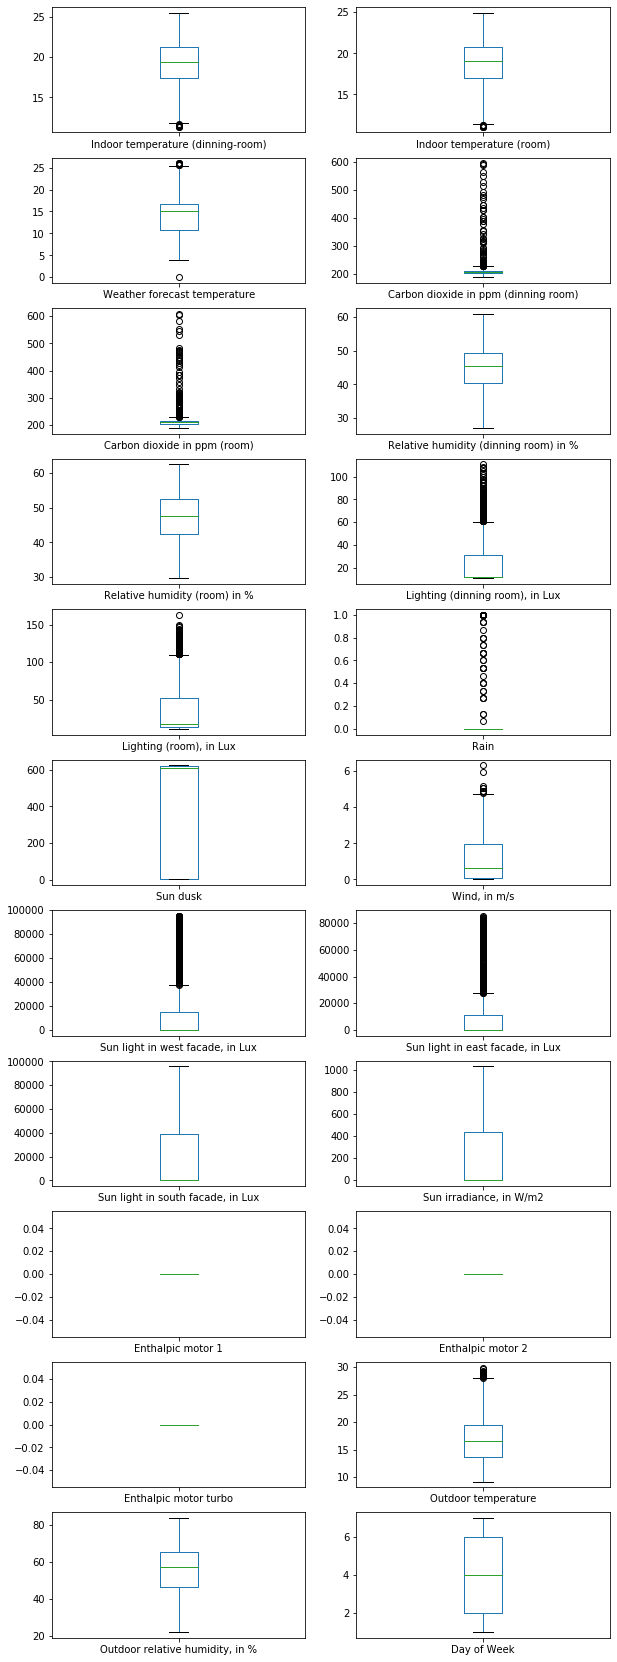

In [14]:
df.plot.box(subplots=True, sharex=False, layout=(11,2),figsize=(10,30))

In [15]:
df['Carbon dioxide in ppm (dinning room)'].max()

594.389

In [16]:
q0 = (df['Carbon dioxide in ppm (dinning room)'].quantile(0.10))
q1 = (df['Carbon dioxide in ppm (dinning room)'].quantile(0.90))
df['Carbon dioxide in ppm (dinning room)'] = np.where(df['Carbon dioxide in ppm (dinning room)'] <q0, q0,df['Carbon dioxide in ppm (dinning room)'])
df['Carbon dioxide in ppm (dinning room)'] = np.where(df['Carbon dioxide in ppm (dinning room)'] >q1, q1,df['Carbon dioxide in ppm (dinning room)'])

In [17]:
q0 = (df['Carbon dioxide in ppm (room)'].quantile(0.10))
q1 = (df['Carbon dioxide in ppm (room)'].quantile(0.90))
df['Carbon dioxide in ppm (room)'] = np.where(df['Carbon dioxide in ppm (room)'] <q0, q0,df['Carbon dioxide in ppm (room)'])
df['Carbon dioxide in ppm (room)'] = np.where(df['Carbon dioxide in ppm (room)'] >q1, q1,df['Carbon dioxide in ppm (room)'])

In [18]:
q0 = (df['Lighting (dinning room), in Lux'].quantile(0.10))
q1 = (df['Lighting (dinning room), in Lux'].quantile(0.90))
df['Lighting (dinning room), in Lux'] = np.where(df['Lighting (dinning room), in Lux'] <q0, q0,df['Lighting (dinning room), in Lux'])
df['Lighting (dinning room), in Lux'] = np.where(df['Lighting (dinning room), in Lux'] >q1, q1,df['Lighting (dinning room), in Lux'])

In [19]:
q0 = (df['Lighting (room), in Lux'].quantile(0.10))
q1 = (df['Lighting (room), in Lux'].quantile(0.90))
df['Lighting (room), in Lux'] = np.where(df['Lighting (room), in Lux'] <q0, q0,df['Lighting (room), in Lux'])
df['Lighting (room), in Lux'] = np.where(df['Lighting (room), in Lux'] >q1, q1,df['Lighting (room), in Lux'])

In [20]:
q0 = (df['Sun light in west facade, in Lux'].quantile(0.10))
q1 = (df['Sun light in west facade, in Lux'].quantile(0.86))
df['Sun light in west facade, in Lux'] = np.where(df['Sun light in west facade, in Lux'] <q0, q0,df['Sun light in west facade, in Lux'])
df['Sun light in west facade, in Lux'] = np.where(df['Sun light in west facade, in Lux'] >q1, q1,df['Sun light in west facade, in Lux'])

In [21]:
q0 = (df['Sun light in east facade, in Lux'].quantile(0.10))
q1 = (df['Sun light in east facade, in Lux'].quantile(0.86))
df['Sun light in east facade, in Lux'] = np.where(df['Sun light in east facade, in Lux'] <q0, q0,df['Sun light in east facade, in Lux'])
df['Sun light in east facade, in Lux'] = np.where(df['Sun light in east facade, in Lux'] >q1, q1,df['Sun light in east facade, in Lux'])

Indoor temperature (dinning-room)           AxesSubplot(0.125,0.826831;0.352273x0.053169)
Indoor temperature (room)                AxesSubplot(0.547727,0.826831;0.352273x0.053169)
Weather forecast temperature                AxesSubplot(0.125,0.763028;0.352273x0.053169)
Carbon dioxide in ppm (dinning room)     AxesSubplot(0.547727,0.763028;0.352273x0.053169)
Carbon dioxide in ppm (room)                AxesSubplot(0.125,0.699225;0.352273x0.053169)
Relative humidity (dinning room) in %    AxesSubplot(0.547727,0.699225;0.352273x0.053169)
Relative humidity (room) in %               AxesSubplot(0.125,0.635423;0.352273x0.053169)
Lighting (dinning room), in Lux          AxesSubplot(0.547727,0.635423;0.352273x0.053169)
Lighting (room), in Lux                      AxesSubplot(0.125,0.57162;0.352273x0.053169)
Rain                                      AxesSubplot(0.547727,0.57162;0.352273x0.053169)
Sun dusk                                    AxesSubplot(0.125,0.507817;0.352273x0.053169)
Wind, in m

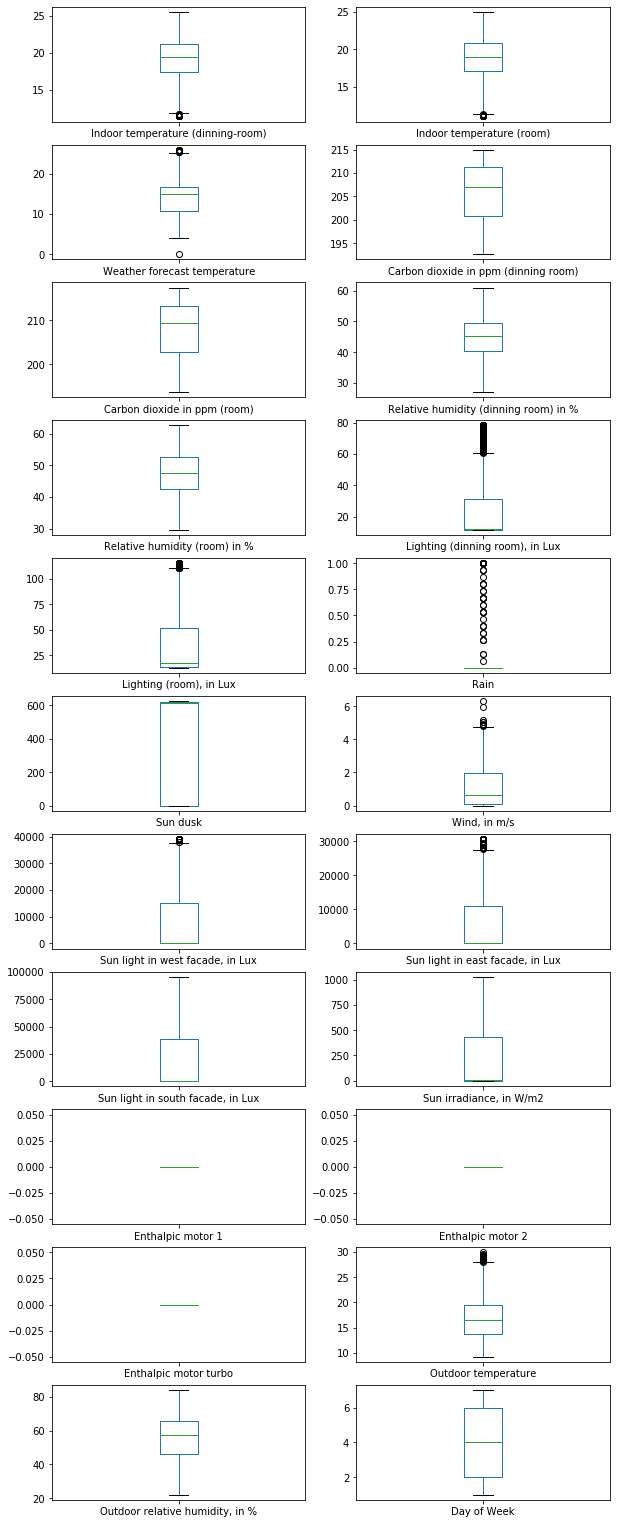

In [22]:
df.plot.box(subplots=True, sharex=False, layout=(12,2),figsize=(10,30))

<font size="3">A kiugró értékek felkutatása érdekében minden attribútumra különböző boxplotot hoztam létre. Ennek segítségével vizuálisan könnyen felismerhetők azok az attribútumok, amelyek kiugró értékeket tartalmaznak. Ezekben az esetekben a 10 és 90%-os kvantilis határt húztam meg, és a túl alacsony, vagy túl magas értékeket ezeknek feleltettem meg. Így az adott rekord az adathalmaz szempontjából lényeges információt, mint hogy az adott esetben magas vagy alacsony értékeket mértek, megtartotta.</font>

In [23]:
df['Enthalpic motor 1'].unique()

array([0], dtype=int64)

In [24]:
df['Enthalpic motor 2'].unique()

array([0], dtype=int64)

In [25]:
df['Enthalpic motor turbo'].unique()

array([0], dtype=int64)

In [26]:
df = df.drop(['Enthalpic motor 1','Enthalpic motor 2', 'Enthalpic motor turbo'],axis=1)

<font size="3">Az adathalmazban szerepelt három olyan attrubútum (Enthalpic motor 1, Enthalpic motor 2, Enhtalpic motor turbo), amelyek értékei minden egyes rekord esetén nullák voltak, így nem hordoztak lényeges információt a vizsgálat szempontjából. Ezeket az attribútumokat eltávolítottam.</font>

In [27]:
df.head(10)

,Date,Time,Indoor temperature (dinning-room),Indoor temperature (room),Weather forecast temperature,Carbon dioxide in ppm (dinning room),Carbon dioxide in ppm (room),Relative humidity (dinning room) in %,Relative humidity (room) in %,"Lighting (dinning room), in Lux",...,Rain,Sun dusk,"Wind, in m/s","Sun light in west facade, in Lux","Sun light in east facade, in Lux","Sun light in south facade, in Lux","Sun irradiance, in W/m2",Outdoor temperature,"Outdoor relative humidity, in %",Day of Week
0,13/03/2012,11:45,18.1875,17.8275,0.0,214.9484,217.3837,39.9125,42.4150,78.22561,...,0.0,623.360,1.42625,9690.240,12604.20,95436.8,758.880,18.1150,48.3750,2
1,13/03/2012,12:00,18.4633,18.1207,6.8,214.9484,217.3837,39.9267,42.2453,78.22561,...,0.0,623.211,1.59200,11022.000,10787.20,95436.8,762.069,18.4147,47.8080,2
2,13/03/2012,12:15,18.7673,18.4367,17.0,214.9484,217.3837,39.7720,42.2267,78.22561,...,0.0,622.656,1.89133,13960.500,9669.63,95398.6,766.251,18.8533,47.4320,2
3,13/03/2012,12:30,19.0727,18.7513,18.0,214.9484,217.0450,39.7760,42.0987,78.22561,...,0.0,622.571,1.82800,18511.200,9648.13,95360.3,766.037,19.2907,47.0240,2
4,13/03/2012,12:45,19.3721,19.0414,20.0,214.9484,216.0800,39.7757,42.0686,78.22561,...,0.0,622.400,2.36071,26349.000,9208.32,95354.9,762.743,19.7400,45.4743,2
5,13/03/2012,13:00,19.6407,19.2773,20.0,214.9484,216.0110,39.8107,42.0347,78.22561,...,0.0,622.400,2.06333,36511.700,8694.78,95354.9,752.683,20.1660,45.5467,2
6,13/03/2012,13:15,19.9120,19.5367,20.0,214.9484,215.8290,39.8613,41.9947,78.22561,...,0.0,622.400,2.23067,39124.104,8501.25,95354.9,740.949,20.5660,44.9680,2
7,13/03/2012,13:30,20.1640,19.7307,20.0,214.9484,215.2960,39.8240,41.9947,78.22561,...,0.0,621.803,1.92400,39124.104,8687.62,95174.7,721.109,20.8427,45.1813,2
8,13/03/2012,13:45,20.4120,19.9693,20.0,214.9484,214.5490,39.9587,42.1253,78.22561,...,0.0,620.651,2.51067,39124.104,8888.32,91848.7,699.392,21.2040,45.4160,2
9,13/03/2012,14:00,20.6400,20.1407,20.0,214.9484,213.9090,39.9400,42.0427,78.22561,...,0.0,620.309,2.65333,39124.104,9046.02,87217.5,677.675,21.5227,45.0213,2


*** 

### Különböző vizualizációs eszközök használata az adathalmaz, illetve az attribútumok között fennálló kapcsolatok feltárására, két vagy több attribútum együttes vizsgálata alkalmas plotok felhasználásával és a kapott eredmények értelmezése.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022145277B48>,
      dtype=object)

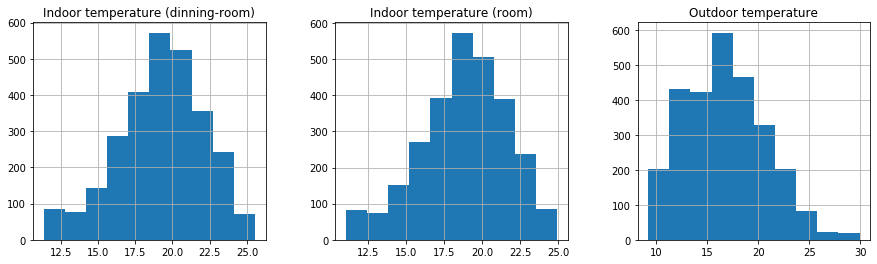

In [28]:
features = ['Indoor temperature (dinning-room)','Indoor temperature (room)', 'Outdoor temperature']
df[features].hist(layout=(1,3),figsize=(15,4))

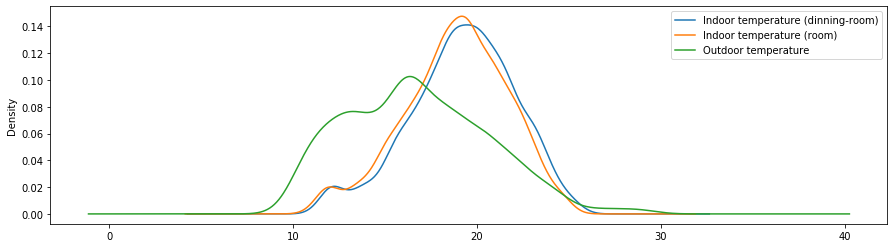

In [29]:
df[features].plot.density(subplots=False,figsize=(15,4))

<font size="3">A ___külső és belső helyszínekre vonatkozó hőmérsékleti adatok___at hisztogram segítségével ábrázoltam. Ebből látszik, hogy a két belső térben szinte megegyeznek a mért adatok és a 18 fok körüli hőmérséklet volt a leggyakoribb, míg a külső hőmérséklet esetében a kisebb értékek a gyakoribbak. Itt a 16 fok körüli eredmények fordultak elő legtöbbször. A hőmérsékleti adatokhoz tartozó  sűrűségfüggvény eloszlásából is ezek az információk olvashatók le. </font>

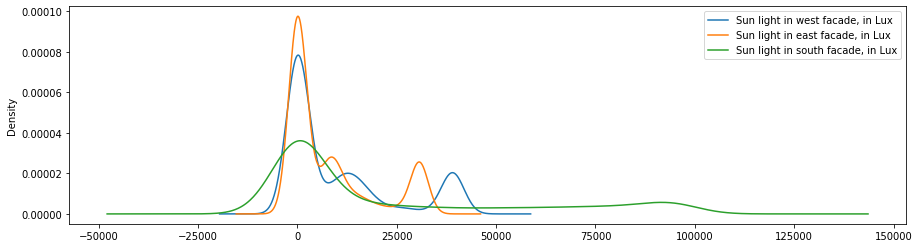

In [30]:
features = ['Sun light in west facade, in Lux','Sun light in east facade, in Lux','Sun light in south facade, in Lux']
df[features].plot.density(subplots=False,figsize=(15,4))

<font size="3">Az egyes ___égtájak felőli homlokzatra eső napfénymennyiség___ sűrűségfüggvényéből leolvasható, hogy mind a 3 attribútum esetében a nullás értékek voltak a leggyakoribbak. A nyugati és keleti oldalra néző homlokzatra eső fénymennyiség közel azonos, a déli oldalra azonban sokkal kevesebb fény esik.</font>

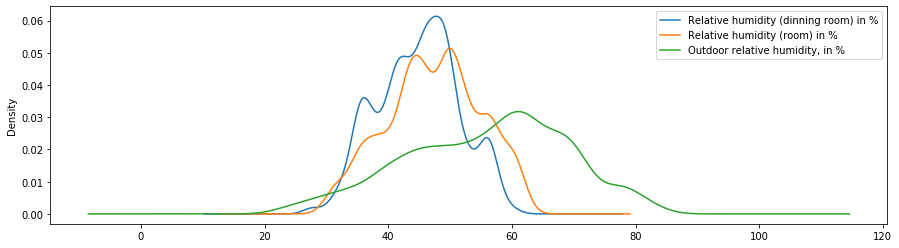

In [31]:
features = ['Relative humidity (dinning room) in %','Relative humidity (room) in %','Outdoor relative humidity, in %']
df[features].plot.density(subplots=False,figsize=(15,4))

<font size="3">A ___relatív páratartalom___ra vonatkozó attribútumok sűrűségfüggvényéből szintén az olvasható le, hogy a két belső helyiségre vonatkozó adatok közelebb esnek egymáshoz, mint a kintről vett adatok, ugyanakkor a belső tereknél is nagyobb eltérések figyelhetők meg, mint a hőmérséklet esetében. Kint a 60% körüli páratartalom volt a leggyakoribb, bent pedig 44% körül mozgott ez az érték.</font>

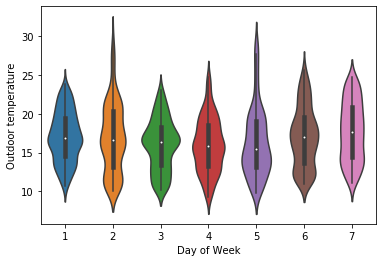

In [32]:
sns.violinplot(data=df,y='Outdoor temperature',x='Day of Week')

<font size="3">Violinplot segítségével megfigyelhető, hogy a ___kint mért hőmérséklet___ek a hét különböző ___nap___jain hasonló eloszlást követnek, ugyanakkor átlagosan kedden és pénteken volt a legmelegebb.</font>

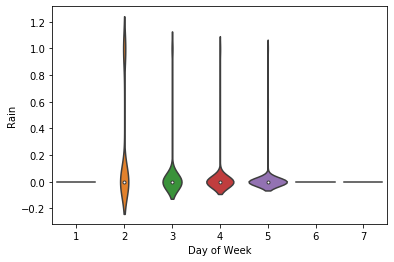

In [33]:
sns.violinplot(data=df,y='Rain',x='Day of Week')

<font size="3">Az ___eső___re vonatkozó adatokat hasonlóan, a ___nap___okkal szemléltetve megfigyelhető, hogy az adatbázisban szereplő értékek alapján  hétfőn, szombaton és vasárnap egyszer sem esett az eső.</font>

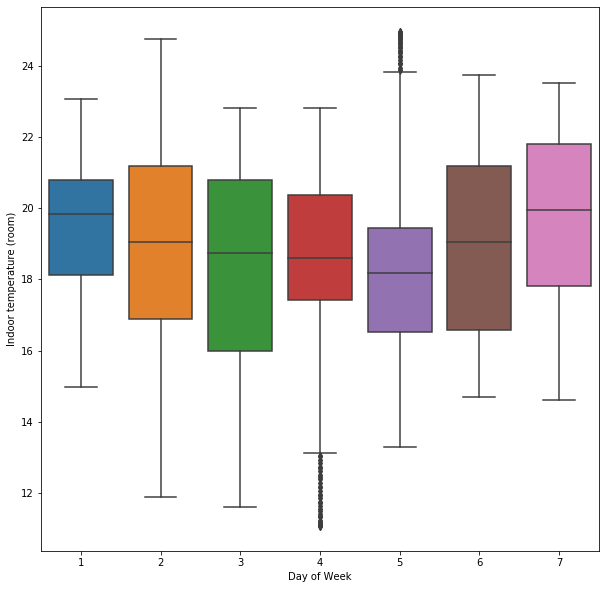

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df,x='Day of Week', y='Indoor temperature (room)',ax=ax)

<font size="3">Boxplot segítségével megvizsgáltam, hogy a ___szobában mért hőmérséklet___re hatással van-e az adott hét ___nap___ja, például mert nincs otthon senki, így nincs szükség fűtésre vagy légkondicionálóra sem. A diagramm alapján arra a következtetésre jutottam, hogy hétvégén többnyire kellemesebb idő volt jellemző, de nagy eltérések nincsenek a napok és a hőmérséklet tekintetében.</font>

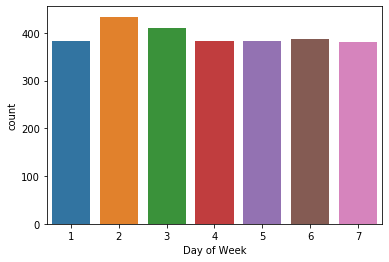

In [35]:
sns.countplot(data=df, x='Day of Week')

<font size="3">Countplot segítségével megvizsgáltam, hogy a mérések hogyan oszlanak meg a hét napjai között. A diagram alapján megfigyelhető, hogy közel azonos mennyiségű rekord származik minden napról, de keddi mérésből van a legtöbb.</font>

In [36]:
corr = df.corr()
corr

,Indoor temperature (dinning-room),Indoor temperature (room),Weather forecast temperature,Carbon dioxide in ppm (dinning room),Carbon dioxide in ppm (room),Relative humidity (dinning room) in %,Relative humidity (room) in %,"Lighting (dinning room), in Lux","Lighting (room), in Lux",Rain,Sun dusk,"Wind, in m/s","Sun light in west facade, in Lux","Sun light in east facade, in Lux","Sun light in south facade, in Lux","Sun irradiance, in W/m2",Outdoor temperature,"Outdoor relative humidity, in %",Day of Week
Indoor temperature (dinning-room),1.000000,0.990941,0.706777,-0.065614,-0.035257,-0.273088,-0.412014,0.035044,-0.028680,-0.270243,0.046683,0.199828,0.295430,-0.210779,-0.039083,0.088068,0.855991,-0.560467,0.033606
Indoor temperature (room),0.990941,1.000000,0.720877,-0.051238,-0.021530,-0.275193,-0.417901,0.074588,0.012154,-0.262621,0.068897,0.220667,0.306847,-0.187323,0.000072,0.123390,0.863417,-0.549681,0.016382
Weather forecast temperature,0.706777,0.720877,1.000000,-0.079133,-0.122979,-0.196824,-0.298878,0.428661,0.386113,-0.093927,0.388211,0.536247,0.510452,0.101718,0.354029,0.483491,0.874630,-0.498806,-0.019986
Carbon dioxide in ppm (dinning room),-0.065614,-0.051238,-0.079133,1.000000,0.962264,0.000903,-0.015928,0.159417,0.142164,-0.195382,0.059279,-0.183992,0.095479,0.108787,0.211458,0.132419,-0.039717,0.066323,-0.058149
Carbon dioxide in ppm (room),-0.035257,-0.021530,-0.122979,0.962264,1.000000,-0.028502,-0.035385,0.031637,0.017224,-0.183062,-0.024812,-0.290544,-0.012348,0.034383,0.087648,-0.002337,-0.075535,0.078949,-0.061299
Relative humidity (dinning room) in %,-0.273088,-0.275193,-0.196824,0.000903,-0.028502,1.000000,0.931267,-0.044245,-0.017949,-0.081597,-0.052456,-0.197537,-0.078512,-0.016678,-0.057019,-0.045240,-0.180670,0.696973,-0.058742
Relative humidity (room) in %,-0.412014,-0.417901,-0.298878,-0.015928,-0.035385,0.931267,1.000000,-0.115330,-0.092547,0.051322,-0.083595,-0.153276,-0.122179,-0.068967,-0.133493,-0.120310,-0.288657,0.809993,-0.103159
"Lighting (dinning room), in Lux",0.035044,0.074588,0.428661,0.159417,0.031637,-0.044245,-0.115330,1.000000,0.950407,-0.109220,0.643672,0.551938,0.587879,0.592017,0.954440,0.955389,0.383403,-0.224767,0.048792
"Lighting (room), in Lux",-0.028680,0.012154,0.386113,0.142164,0.017224,-0.017949,-0.092547,0.950407,1.000000,-0.114366,0.652550,0.491894,0.539429,0.707393,0.966870,0.941382,0.318505,-0.188299,0.045216
Rain,-0.270243,-0.262621,-0.093927,-0.195382,-0.183062,-0.081597,0.051322,-0.109220,-0.114366,1.000000,-0.005661,0.239575,-0.135458,-0.127236,-0.137075,-0.139149,-0.228997,0.294056,-0.172566


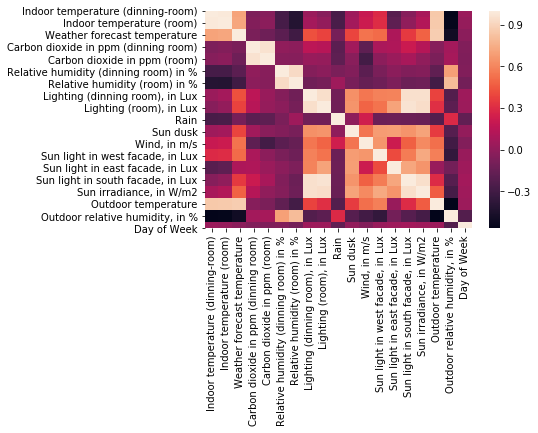

In [37]:
sns.heatmap(corr)

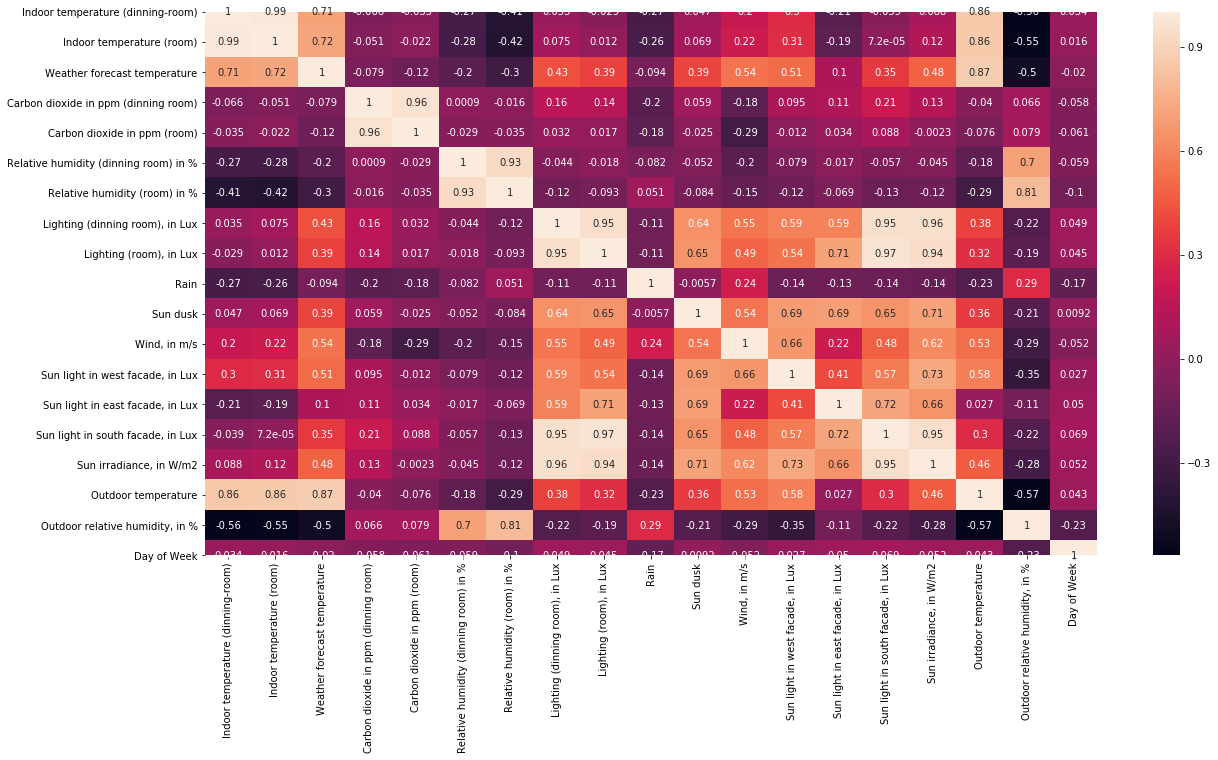

In [103]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr,annot=True,ax=ax)

<font size="3">Az adathalmaz attribútumai között fennálló kapcsolatot egy ___korrelációs táblázat___ segítségével szemléltettem. A könnyebb átláthatóság érdekében a kapott eredményt egy ___heatmap___pal is megjelenítettem, majd úgy is, hogy a heatmap ne csak a színekkel hanem az egyes cellákhoz tartozó értékek megjelenítésével is segítse a könnyebb értelmezést. 
</font>

<font size="3">Ez alapján megfigyelhető, hogy mely attribútumok azok, amelyek szorosabb kapcsolatban állnak egymással. Pozitív kapcsolat esetén a cellák színe egyre világosabb, a bennük szereplő érték pedig egyre közelebb esik az 1-hez. Negatív kapcsolat esetén a cellák színe egyre sötétebb, és az értékek egyre közelebb esnek a -1-hez. Azokban az esetekben, ahol a két attribútum között nincsen erős korrelációs kapcsolat, az értékek 0 körül mozognak. Ez alapján megfigyelhető például, hogy a szoba hőmérséklete szoros kapcsolatban van az étkező hőmérsékletével, a kinti hőmérséklettel és az előre jelzésekkel (erős pozitív korreláció), valamint a szobában mért és a külső relatív páratartalommal (erős negatív korreláció). </font>


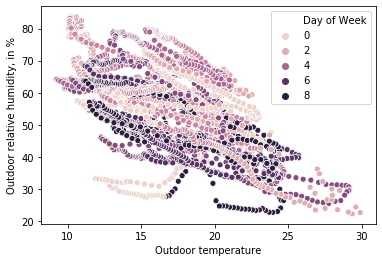

In [39]:
sns.scatterplot(data=df,x='Outdoor temperature',y='Outdoor relative humidity, in %', hue='Day of Week')

<font size="3">Az attribútumok között fennálló kapcsolatok vizsgálatára ___pontdiagram___okat alkalmaztam, amelyek alapján arra a következtetésre jutottam, hogy többnyire lineáris kapcsolat figyelhető meg az egyes oszlopok értékei között. Például minél magasabb a kinti relatív páratartalom, annál alacsonyabb a hőmérséklet.</font>

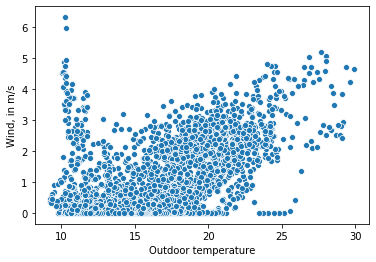

In [40]:
sns.scatterplot(data=df,x='Outdoor temperature',y='Wind, in m/s')

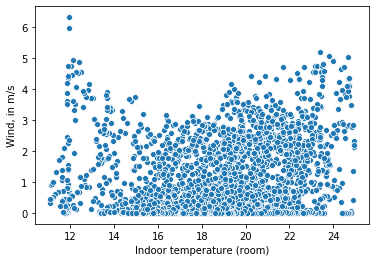

In [41]:
sns.scatterplot(data=df,x='Indoor temperature (room)',y='Wind, in m/s')

<font size="3">Ugyanakkor, a hőmérsékletek adatai és a szél erőssége között nincsen egyértelmű kapcsolat.</font>

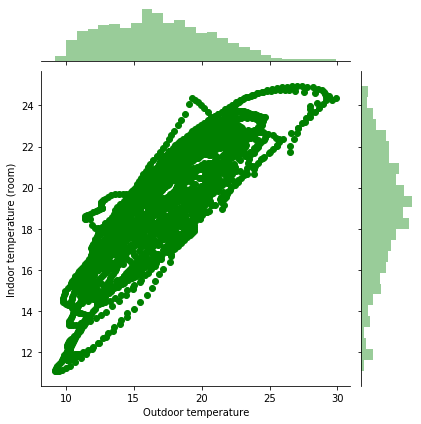

In [42]:
sns.jointplot(data=df,x='Outdoor temperature',y='Indoor temperature (room)', color='g')

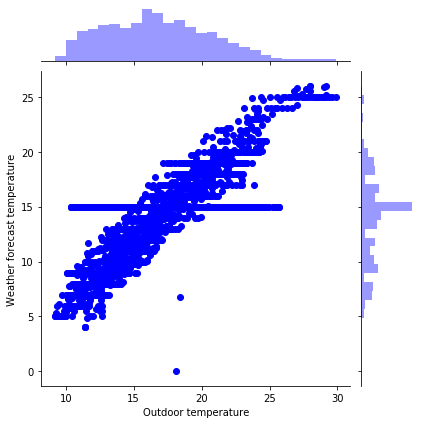

In [43]:
sns.jointplot(data=df,x='Outdoor temperature',y='Weather forecast temperature', color='b')

<font size="3">___Joinplot___ segítségével megfigyelhető, hogy a kinti és benti hőmérsékleti adatok között lineáris kapcsolat áll fent, ugyanakkor kint átlagosan alacsonyabb hőmérsékleti értékek voltak gyakoribbak a bent mért értékekhez képest.  </font>

<font size="3">Hasonlóan megjelenítve az előrejelzések adatait a kinti hőmérsékleti adatokkal, szintén lineáris kapcsolat figyelhető meg, ugyanakkor itt több kiugró értékkel találkozhatunk. Az előrejelzések gyakran 15 °C-os hőmérsékletet adtak, azonban a valódi hőmérséklet ettől több esetben eltért.</font>

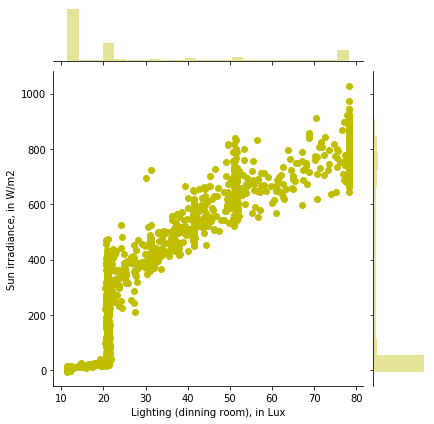

In [44]:
sns.jointplot(data=df,x='Lighting (dinning room), in Lux',y='Sun irradiance, in W/m2', color='y') 

<font size="3">Az étkező világosságára és a nap erősségére vonatkozó adatokat hasonló módon, joinplot segítségével szemléltetve erős lineáris kapcsolat figyelhető meg. Az étkező megvilágítottságának adatai 20 és 80 Lux-nál  a kiugró értékek kezelése miatt sűrűbbek.</font>

<font size="3">Alkalmas ___pairplot___ok segítségével külön-külön is megvizsgáltam az egyes attribútumok közötti kapcsolatokat. Az eredmények alapján megfigyelhető, hogy többnyire lineáris kapcsolat áll fent az oszlopok értékei között, de vannak olyan esetek, amikor az adatok teljesen szétszórva jelennek meg. Ekkor nincsen kapcsolat az attribútumok között. Ezek az értékek a korrelációs táblázatból is kiolvashatók.</font>

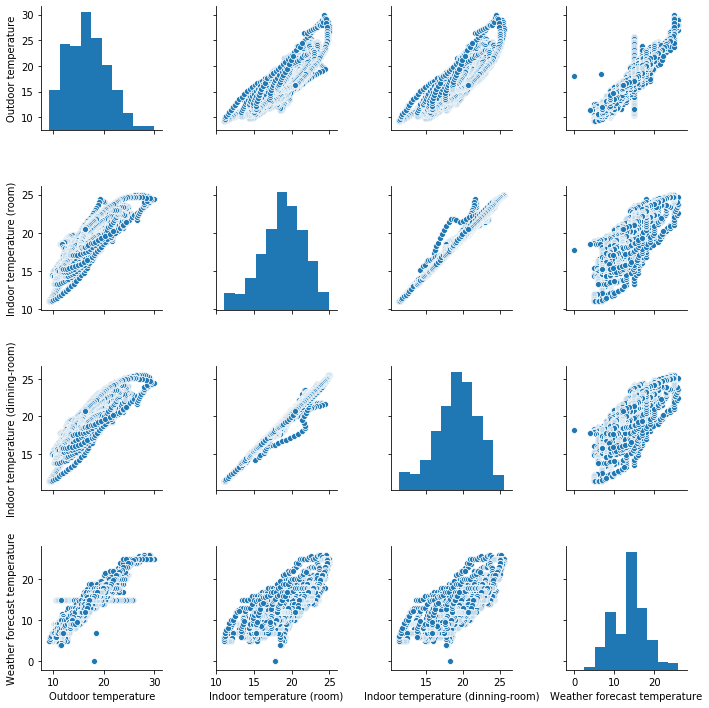

In [45]:
features = ['Outdoor temperature', 'Indoor temperature (room)', 'Indoor temperature (dinning-room)','Weather forecast temperature']
sns.pairplot(df.loc[:,features])

In [46]:
# sns.pairplot(df)

 ***

### Klaszterezésre használható algoritmus kiválasztása, bemutatása, illetve annak az adathalmazra történő alkalmazása, a kapott eredmények értelmezése.

<font size="3">Klaszterezéshez a ___k-közép módszer___t választottam, amely egy prototípus-alapú, felosztó klaszterező módszer. Megpróbálja megkeresni az általunk megadott számú (k) klasztert, amelyeket a középpontjaik képviselnek.</font>

<font size="3">A módszer lényegében egy középpontot választ ki prototípusnak, amely gyakran pontok egy csoportjának az átlaga. Az algoritmus általában egyszerű hasonlósági mértékeket használ, mivel újra meg újra kiszámolja a pontok és a középpontok közötti hasonlóságot. Jellemzően folytonos, n-dimenziós térben elhelyezkedő pontokra alkalmazható.  </font>

<font size="3">Első lépésként a ___k-könyök módszer___ segítségével meghatároztam a klaszterek ideális számát. A megfelelő klaszterszám az a pont lesz, ami a görbe "könyökénél" helyezkedik el.</font> 

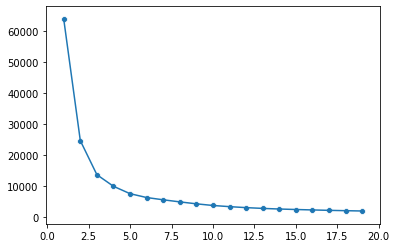

In [47]:
err = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Indoor temperature (room)','Outdoor temperature']]);
    err.append([kmeans.n_clusters, kmeans.inertia_])

err = np.asarray(err)
sns.lineplot(err[:,0], err[:,1])
sns.scatterplot(err[:,0], err[:,1]);

<font size="3">Ezt követően felépítettem a klaszterező algoritmust, amely az ___Indoor temperature (room)___ és az ___Outdoor temperature___ attribútumokat felhasználva hajt végre csoportosítást. Az attribútumok közötti lineáris kapcsolat a korábban létrehozott pairplotok segítségével megfigyelhető, így a klaszterezés szempontjából megfelelő attribútumnak minősülnek.  </font>

In [48]:
err = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Indoor temperature (room)','Outdoor temperature']])
    err.append([kmeans.n_clusters, kmeans.inertia_])

err = np.asarray(err)
print(err)

[[1.00000000e+00 6.37120865e+04]
 [2.00000000e+00 2.45522509e+04]
 [3.00000000e+00 1.35706664e+04]
 [4.00000000e+00 9.84126849e+03]
 [5.00000000e+00 7.45964347e+03]
 [6.00000000e+00 6.21628566e+03]
 [7.00000000e+00 5.51612362e+03]
 [8.00000000e+00 4.81110147e+03]
 [9.00000000e+00 4.18990448e+03]]


In [49]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['Indoor temperature (room)','Outdoor temperature']]);
kmeans.cluster_centers_

array([[21.95002   , 21.79933972],
       [19.18559537, 16.77660207],
       [15.60348501, 12.37826791]])

<font size="3">A klaszter középpontok koordinátái.</font>

In [50]:
def plot_result(kmeans):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df['Indoor temperature (room)'], y=df['Outdoor temperature'], hue=kmeans.labels_, palette="Set1", marker='+');
    sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker='o', s=100, c=['black']);

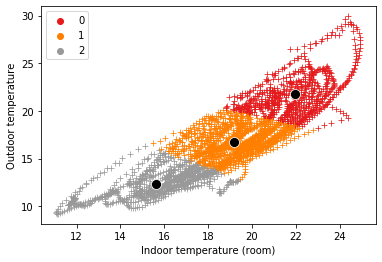

In [51]:
plot_result(kmeans)

In [52]:
kmeans.predict([[17,15],[22,19]])

array([1, 0])

<font size="3">A plotolás segítségével megfigyelhető a klaszterezés eredménye. A különböző színek jelölik a különböző klaszter csoportokat. A paramétereknek megfelelően (k=3) 3 darab klasztert különböztethetünk meg egymástól. </font>

<font size="3">Prediktálás segítségével megadhatunk különböző pontokat, amelyekről visszakapjuk, hogy a klaszterezés folyamán mely csoportokba kerültek beosztásra. A fent szereplő utasításból megfigyelhető, hogy a (17,15) pont a 2. míg a (22,19) pont az 1. csoportba került beosztásra.</font>

 ***

### Lineáris regresszió alkalmazása folytonos attribútum esetén, az eredmények értelmezése, illetve azok felhasználása

<font size="3">A korábban létrehozott pairplotokat és scatterplotokat megvizsgálva választottam ki két olyan attribútumot, amelyek között erős lineáris kapcsolat figyelhető meg. Ezek alapján a ___Lighting (dinning room), in Lux___ valamint a ___Sun irradiance, in W/m2___ oszlopokat felhasználva készítettem lineáris regressziót. </font>

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
x = df[['Lighting (dinning room), in Lux']].to_numpy()
y = df['Sun irradiance, in W/m2'].to_numpy()

In [55]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
reg.coef_

array([12.80791247])

In [57]:
reg.intercept_

-121.95884226082265

<font size="3">A lineáris regresszió eredményeként a $\theta$ eggyüthatóit kapjuk meg:
<br><br>
<center>$h(x) = \theta_0 + \theta_1 x_1  $</center>

ahol h(x) a pontokra leginkább illeszkedő egyenes egyenlete.
</font>

<font size="3">
Ebben az esetben

<center>$\theta_0$ = -121.9588<center>
    
<center>$\theta_1$ = 12.8079<center>
</font>

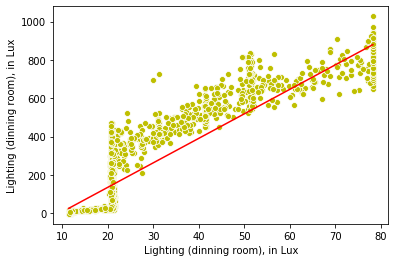

In [58]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
h = theta0 + theta1 * df['Lighting (dinning room), in Lux']
sns.scatterplot(df['Lighting (dinning room), in Lux'],df['Sun irradiance, in W/m2'],color='y')
sns.lineplot(df['Lighting (dinning room), in Lux'],h,color='r')

In [59]:
m = y.shape[0]
error = np.sum((h-y)**2)/(2*m)
error

3852.0258003200806

<font size="3">Az error kiszámításának segítségével a lineáris regresszió pontatlanságát figyelhetjük meg. Jelen esetben ez elég nagy, így érdemes lehet pontosabb illesztést alkalmazni.</font>

In [60]:
reg.predict([[40]])

array([390.35765634])

<font size="3">A regressziót felhasználva lehetőségünk van pontok prediktálására. Ebben az esetben a megadott x értékhez tartozó közelített y értéket kapjuk vissza, az illesztett egyenest felhasználva. Ezek alapján például az x=40-hez prediktált y érték 390.3577.</font>

<font size="3">Az előző megoldás nagy hibája miatt, egy pontosabb modellt alkalmazva is megpróbáltam lineáris regressziót létrehozni. A modell a következő:
 <center>$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \theta_3 x_1^3$<center>
     </font>

In [61]:
df1 = df

df1['x2'] = df1['Lighting (dinning room), in Lux']**2
df1['x3'] = df1['Lighting (dinning room), in Lux']**3

In [62]:
X = df1[['Lighting (dinning room), in Lux','x2','x3']].to_numpy()
y = df1['Sun irradiance, in W/m2'].to_numpy()

In [63]:
reg2 = LinearRegression()
reg2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
reg2.coef_

array([ 2.61091144e+01, -1.41558839e-01, -2.03557956e-04])

In [65]:
reg2.intercept_

-289.5418429088526

<font size="3">
Ebben az esetben
    <br><br>
<center>$\theta_0$ = -289.5484<center>   
<center>$\theta_1$ = 2.6109<center>
<center>$\theta_2$ = -1.4156<center>
<center>$\theta_3$ = -2.0356<center>
</font>

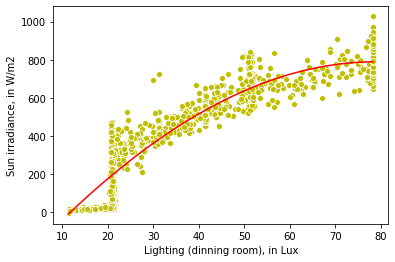

In [66]:
theta0 = reg2.intercept_
theta1 = reg2.coef_[0]
theta2 = reg2.coef_[1]
theta3 = reg2.coef_[2]
h = theta0 + theta1 * df1['Lighting (dinning room), in Lux'] + theta2 * df1['x2'] + theta3 * df1['x3']
sns.scatterplot(df1['Lighting (dinning room), in Lux'],df['Sun irradiance, in W/m2'],color='y')
sns.lineplot(df1['Lighting (dinning room), in Lux'],h,color='r')

In [67]:
m = y.shape[0]
error2 = np.sum((h-y)**2)/(2*m)
error2

1948.5141017002832

In [68]:
reg2.predict([[40,40**2,40**3]])

array([515.30088056])

<font size="3">Ez alapján, az x=40 ponthoz prediktált y érték 515.3, ami sokkal közelebb áll az adatokhoz, mint az előző esetben.</font>

In [69]:
error/error2

1.9769042456294177

<font size="3">A második modell 1.98-szor pontosabb eredményt biztosít.</font>

 ***

### Logisztikus regresszió alkalmazása diszkrét attribútum esetén, az eredmények értelmezése, illetve azok felhasználása

<font size="3">Mivel az adathalmaz nem rendelkezett diszkrét értékeket tartalmazó attribútummal, így bevezettem egy új oszlopot, amelynek elemeit az ___Outdoor temperature___ oszlophoz tartozó adatokból származtattam.</font>

<font size="3">A korábban létrehozott korrelációs táblázatokat, pairplotokat és scatterplotokat megvizsgálva választottam ki két olyan attribútumot, amelyek erős korrelációs kapcsolatban állnak az Outdoor temperature oszlop elemeivel. Ezek alapján a logisztikus regresszióhoz használt attribútumok a következők: ___Indoor temperature (dinning-room)___, ___Weather forecast temperature___, ___t___ (a számított oszlop).</font>

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
df['t'] = df.apply(lambda row: 'cool' if row['Outdoor temperature'] < 15 else 'pleasing' if row['Outdoor temperature'] < 22 else 'warm', axis=1)

In [72]:
df.head()

,Date,Time,Indoor temperature (dinning-room),Indoor temperature (room),Weather forecast temperature,Carbon dioxide in ppm (dinning room),Carbon dioxide in ppm (room),Relative humidity (dinning room) in %,Relative humidity (room) in %,"Lighting (dinning room), in Lux",...,"Sun light in west facade, in Lux","Sun light in east facade, in Lux","Sun light in south facade, in Lux","Sun irradiance, in W/m2",Outdoor temperature,"Outdoor relative humidity, in %",Day of Week,x2,x3,t
0,13/03/2012,11:45,18.1875,17.8275,0.0,214.9484,217.3837,39.9125,42.4150,78.22561,...,9690.24,12604.20,95436.8,758.880,18.1150,48.3750,2,6119.24606,478681.755774,pleasing
1,13/03/2012,12:00,18.4633,18.1207,6.8,214.9484,217.3837,39.9267,42.2453,78.22561,...,11022.00,10787.20,95436.8,762.069,18.4147,47.8080,2,6119.24606,478681.755774,pleasing
2,13/03/2012,12:15,18.7673,18.4367,17.0,214.9484,217.3837,39.7720,42.2267,78.22561,...,13960.50,9669.63,95398.6,766.251,18.8533,47.4320,2,6119.24606,478681.755774,pleasing
3,13/03/2012,12:30,19.0727,18.7513,18.0,214.9484,217.0450,39.7760,42.0987,78.22561,...,18511.20,9648.13,95360.3,766.037,19.2907,47.0240,2,6119.24606,478681.755774,pleasing
4,13/03/2012,12:45,19.3721,19.0414,20.0,214.9484,216.0800,39.7757,42.0686,78.22561,...,26349.00,9208.32,95354.9,762.743,19.7400,45.4743,2,6119.24606,478681.755774,pleasing


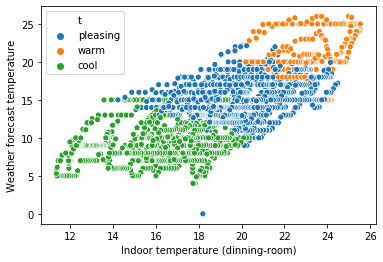

In [73]:
sns.scatterplot(df1['Indoor temperature (dinning-room)'],df['Weather forecast temperature'],hue=df['t'])

In [74]:
X = df[['Indoor temperature (dinning-room)','Weather forecast temperature']].to_numpy()
y = df['t'].to_numpy()

In [75]:
reg = LogisticRegression()
reg.fit(X,y)

C:\Users\Panna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Panna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
reg.coef_

array([[-0.52186754, -0.46897188],
       [ 0.20198092,  0.10777147],
       [ 0.20988617,  0.38869445]])

In [77]:
reg.intercept_

array([ 15.10439465,  -5.1002868 , -12.8579637 ])

<font size="3">A lineáris regresszióhoz hasonlóan, itt is egyenesek illesztése történik, a regresszió ehhez meghatározza a megfelelő 𝜃 értékeket. Ezek alapján kiszámítottam az egyeneseket, amelyek az egyes csoportok határvonalait közelítik és vizuálisan is megjelenítettem az eredményeket.</font>

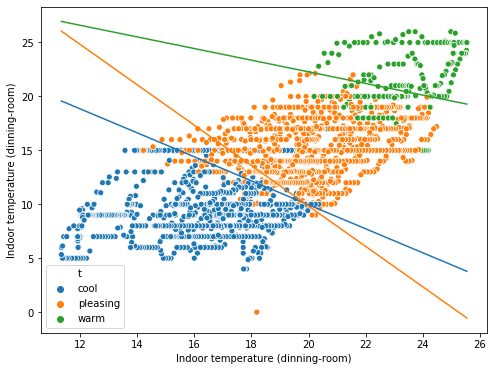

In [78]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['Indoor temperature (dinning-room)'],df['Weather forecast temperature'],hue=df['t'],hue_order=['cool','pleasing','warm'])
for i in range(3):
    theta0 = reg.intercept_[i]
    theta1 = reg.coef_[i,0]
    theta2 = reg.coef_[i,1]
    x2 = -(theta0+theta1*df['Indoor temperature (dinning-room)'])/theta2
    sns.lineplot(df['Indoor temperature (dinning-room)'],x2)
# plt.ylim((0,35));

In [79]:
reg.predict([[17,10],[23,20],[16,15]])

array(['cool', 'pleasing', 'pleasing'], dtype=object)

<font size="3">A logisztikus regresszió eredményét felhasználva, prediktálás során a paraméterként megadott pontról a modell eldönti, hogy mely csoportba tartozik. A példa szerint, a (17,10) pont a 'cool' csoportba sorolandó.</font>

In [80]:
reg.predict_proba([[17,10]])

array([[0.69511259, 0.30110506, 0.00378235]])

<font size="3">Megfigyelhető, hogy a paraméterként megadott pont mely csoportba, hány százalékos valószínűséggel sorolandó.</font>

<font size="3">A plotolás alapján ugyanakkor az is megfigyelhető, hogy a modell illesztése nem túl pontos. Például a "warm" címkéhez tartozó értékek jelentős része kerül besorolásra a "pleasing" csoportba.</font>

*** 

### Osztályozási módszerek, gépi tanulás

<font size="3">Az osztályozás létrehozásához szükséges diszkrét értékeket tartalmazó attribútumnak (osztálycímke) a fentebb létrehozott ___t___ attribútumot választottam. Ebbe az oszlopba háromféle érték figyelhető meg: ___cool___, ___pleasing___ valamint ___warm___. Ezek értéke az Outdoor temperature oszlop értékeitől függ.</font>

<font size="3">A korrelációs táblázat értékeit megvizsgálva választottam ki az algoritmus tanításához szükséges attribútumokat. Nem kerültek kiválasztásra azok az oszlopok amelyeket eltávolítottam a tisztítási szakaszban (mert nem releváns értékeket tartalmaztak), az Outdoor temperature, hiszen a prediktálandó értékeket ebből származtattam, valamint a Date, Time és a Day of Week attribútumok, mivel ezek nem relevánsak az osztályozás szempontjából. </font>

In [81]:
subdf1 = df.loc[:,'Indoor temperature (dinning-room)':'Sun irradiance, in W/m2']
subdf2 = df.loc[:,'Outdoor relative humidity, in %']
subdf = pd.concat([subdf1,subdf2], axis=1)
subdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 17 columns):
Indoor temperature (dinning-room)        2764 non-null float64
Indoor temperature (room)                2764 non-null float64
Weather forecast temperature             2764 non-null float64
Carbon dioxide in ppm (dinning room)     2764 non-null float64
Carbon dioxide in ppm (room)             2764 non-null float64
Relative humidity (dinning room) in %    2764 non-null float64
Relative humidity (room) in %            2764 non-null float64
Lighting (dinning room), in Lux          2764 non-null float64
Lighting (room), in Lux                  2764 non-null float64
Rain                                     2764 non-null float64
Sun dusk                                 2764 non-null float64
Wind, in m/s                             2764 non-null float64
Sun light in west facade, in Lux         2764 non-null float64
Sun light in east facade, in Lux         2764 non-null float64
Sun light i

In [82]:
subdf.head(10)

,Indoor temperature (dinning-room),Indoor temperature (room),Weather forecast temperature,Carbon dioxide in ppm (dinning room),Carbon dioxide in ppm (room),Relative humidity (dinning room) in %,Relative humidity (room) in %,"Lighting (dinning room), in Lux","Lighting (room), in Lux",Rain,Sun dusk,"Wind, in m/s","Sun light in west facade, in Lux","Sun light in east facade, in Lux","Sun light in south facade, in Lux","Sun irradiance, in W/m2","Outdoor relative humidity, in %"
0,18.1875,17.8275,0.0,214.9484,217.3837,39.9125,42.4150,78.22561,113.5200,0.0,623.360,1.42625,9690.240,12604.20,95436.8,758.880,48.3750
1,18.4633,18.1207,6.8,214.9484,217.3837,39.9267,42.2453,78.22561,113.6050,0.0,623.211,1.59200,11022.000,10787.20,95436.8,762.069,47.8080
2,18.7673,18.4367,17.0,214.9484,217.3837,39.7720,42.2267,78.22561,113.6000,0.0,622.656,1.89133,13960.500,9669.63,95398.6,766.251,47.4320
3,19.0727,18.7513,18.0,214.9484,217.0450,39.7760,42.0987,78.22561,113.3440,0.0,622.571,1.82800,18511.200,9648.13,95360.3,766.037,47.0240
4,19.3721,19.0414,20.0,214.9484,216.0800,39.7757,42.0686,78.22561,113.0340,0.0,622.400,2.36071,26349.000,9208.32,95354.9,762.743,45.4743
5,19.6407,19.2773,20.0,214.9484,216.0110,39.8107,42.0347,78.22561,113.6000,0.0,622.400,2.06333,36511.700,8694.78,95354.9,752.683,45.5467
6,19.9120,19.5367,20.0,214.9484,215.8290,39.8613,41.9947,78.22561,112.9810,0.0,622.400,2.23067,39124.104,8501.25,95354.9,740.949,44.9680
7,20.1640,19.7307,20.0,214.9484,215.2960,39.8240,41.9947,78.22561,111.2590,0.0,621.803,1.92400,39124.104,8687.62,95174.7,721.109,45.1813
8,20.4120,19.9693,20.0,214.9484,214.5490,39.9587,42.1253,78.22561,83.3547,0.0,620.651,2.51067,39124.104,8888.32,91848.7,699.392,45.4160
9,20.6400,20.1407,20.0,214.9484,213.9090,39.9400,42.0427,78.22561,83.3600,0.0,620.309,2.65333,39124.104,9046.02,87217.5,677.675,45.0213


In [83]:
X = subdf
y = df['t']

<font size="3">Az adathalmazt tanuló és teszthalmazra bontottam úgy, hogy az adathalmaz 80%-a a tanuló halmazt adja ki, és a prediktálandó értékek mind két halmazban azonos arányban forduljanak elő. </font>

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [85]:
y_test.value_counts()/y_test.shape[0]

pleasing    0.556962
cool        0.345389
warm        0.097649
Name: t, dtype: float64

In [86]:
y_train.value_counts()/y_train.shape[0]

pleasing    0.557214
cool        0.344640
warm        0.098146
Name: t, dtype: float64

In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2211, 17), (553, 17), (2211,), (553,))

<font size="3">Az osztályozáshoz szükséges attribútumokat normalizáltam.</font>

In [88]:
from sklearn import preprocessing

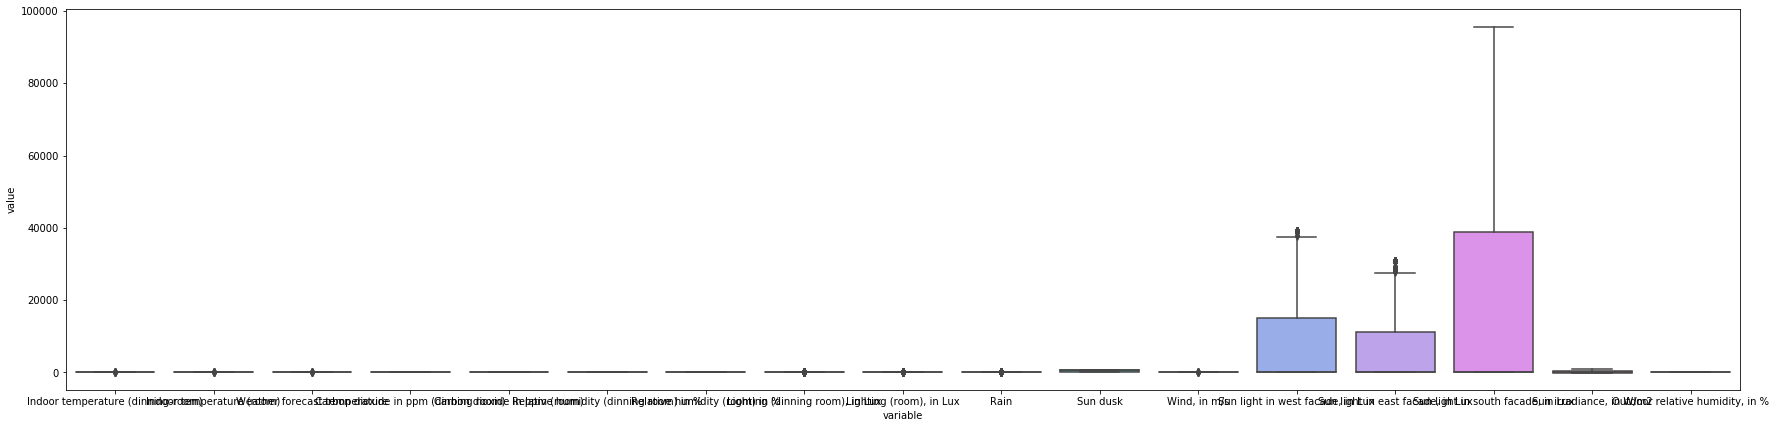

In [89]:
plt.figure(figsize=(30,7))
sns.boxplot(x="variable", y="value", data=pd.melt(X));

In [90]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [91]:
scaler.mean_

array([1.92249202e+01, 1.88540560e+01, 1.39077948e+01, 2.05698425e+02,
       2.07692622e+02, 4.48875896e+01, 4.72924265e+01, 2.67854832e+01,
       3.92962003e+01, 4.60726665e-02, 3.27934749e+02, 1.11158949e+00,
       1.00722238e+04, 7.96426578e+03, 2.27694027e+04, 2.20951608e+02,
       5.58513867e+01])

In [92]:
scaler.scale_

array([2.82284287e+00, 2.79373943e+00, 4.18661479e+00, 6.98441258e+00,
       7.45291242e+00, 6.57954221e+00, 7.54703493e+00, 2.26202729e+01,
       3.80558356e+01, 2.03916692e-01, 3.04786924e+02, 1.15527413e+00,
       1.40044330e+04, 1.09876967e+04, 3.32525009e+04, 3.01709022e+02,
       1.29135657e+01])

In [93]:
X_train_normalized = scaler.transform(X_train)

In [94]:
X_train_normalized.mean(axis=0)

array([ 2.76375736e-16, -2.37811680e-16,  8.67691265e-17, -3.48683342e-16,
        3.82185865e-15,  5.93725782e-16, -3.36632074e-16, -7.39144411e-17,
        1.86392938e-16, -3.21367135e-18, -1.30153690e-16,  5.94529200e-17,
        1.12478497e-17, -8.43588730e-17,  6.90939341e-17, -7.23076054e-17,
        2.89230422e-17])

In [95]:
X_train_normalized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

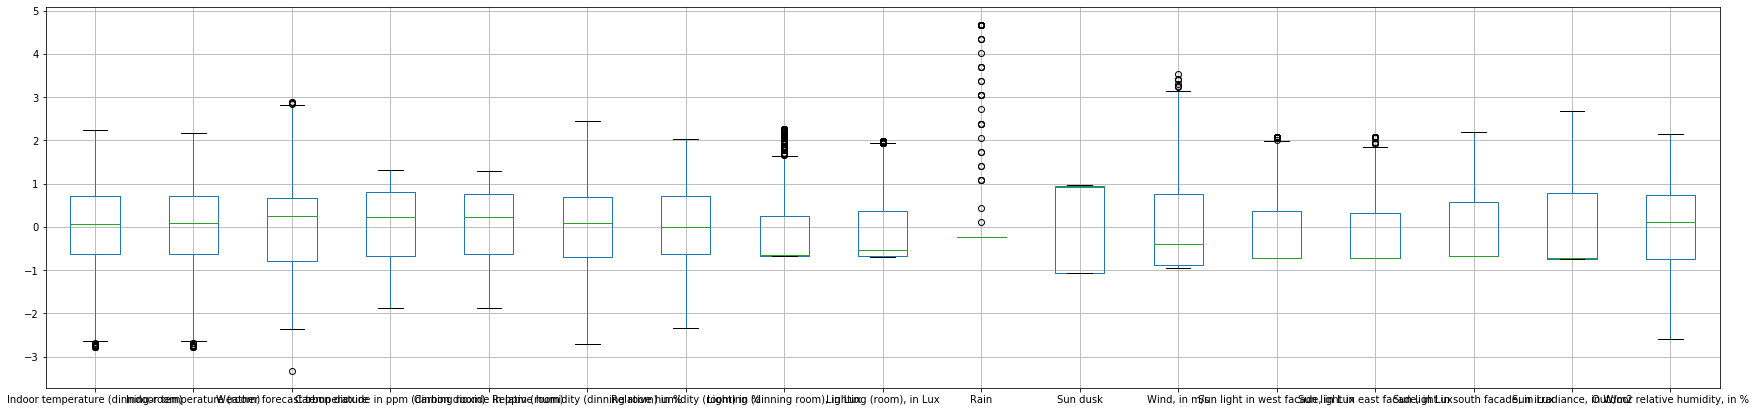

In [96]:
subdf_train_normalized = X_train.copy()
subdf_train_normalized.loc[:,'Indoor temperature (dinning-room)':'Outdoor relative humidity, in %'] = X_train_normalized
plt.figure(figsize=(30,7))
subdf_train_normalized.boxplot();

 ***

<font size="3">Az osztályozás egy olyan f célfüggvény megtanulásának a feladata, amely attribútumértékek minden egyes x halmazához előre definiált osztálycímkék valamelyikét ( y ) rendeli hozzá. Az osztályozás megvalósításához én a ___Logisztikus Regresszió___t választottam.</font>

<font size="3">A Logisztikus Regresszió (más osztályozó modellekhez hasonlóan) egy tanuló algoritmust alkalmaz annak a modellnek a megtalálására, amely a legjobban illeszkedik a bemenő adatok attribútumai és osztálycímkéi közötti kapcsolatra. A generált modellnek jól kell illeszkednie a bemenő adatokra, és helyesen kell megjósolnia a korábban nem látott rekordok osztálycímkéit.</font>

<font size="3">A tanulóhalmaz a korábban létrehozott X_train (rekordok) és y_train (hozzájuk tartozó osztálycímke) elemeiből épül fel. A teszthalmaz a korábban szintén létrehozott X_test (rekordok) és y_test (hozzájuk tartozó osztálycímke) adataiból épül fel.</font>

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
reg = LogisticRegression(max_iter=100000)
reg.fit(X_train,y_train)

C:\Users\Panna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Panna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
predicted = reg.predict(X_test)
list(zip(predicted,y_test))

[('cool', 'cool'),
 ('warm', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('cool', 'pleasing'),
 ('warm', 'warm'),
 ('cool', 'cool'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('cool', 'pleasing'),
 ('pleasing', 'cool'),
 ('cool', 'cool'),
 ('pleasing', 'pleasing'),
 ('warm', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('cool', 'cool'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'cool'),
 ('cool', 'cool'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'cool'),
 ('pleasing', 'cool'),
 ('pleasing', 'cool'),
 ('cool', 'cool'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('cool', 'cool'),
 ('warm', 'warm'),
 ('cool', 'cool'),
 ('cool', 'cool'),
 ('pleasing', 'warm'),
 ('pleasing', 'pleasing'),
 ('cool', 'cool'),
 ('cool', 'cool'),
 ('pleasin

In [100]:
from sklearn.metrics import accuracy_score
print("Test accuracy:")
accuracy_score(y_test, predicted)

Test accuracy:


0.9023508137432188

In [101]:
from sklearn.metrics import accuracy_score
print("Train accuracy:")
accuracy_score(y_train, reg.predict(X_train))

Train accuracy:


0.8783355947535052

<font size="3">A generált modell a teszthalmazon 87.7%-os, a tanuló halmazon 86.9%-os pontossággal képes megadni a rekordokhoz tartozó osztálycímkét.</font>

<font size="3">Habár a modell viszonylag jól teljesít, a prediktálás pontosságán segíthet az adathalmaz elemszámának növelése, így nagyobb tanulóhalmazon tudna a modell betanulni.</font>

***